Link : `https://www.kaggle.com/`

# Import

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get Dataset

In [2]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data preprocessing

In [3]:
insurance_encoded = pd.get_dummies(insurance)
insurance_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
X = insurance_encoded.drop(['charges'], axis=1, inplace=False)
y = insurance_encoded['charges']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating model

In [7]:
tf.random.set_seed(42)

In [8]:
inputShape = X.shape[1]
inputShape

11

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(inputShape),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

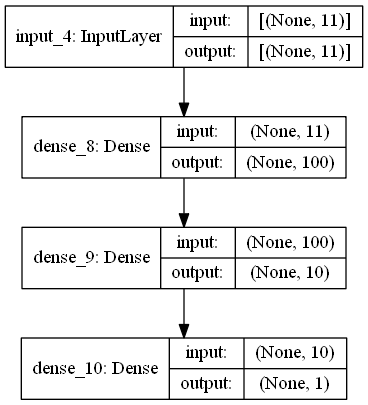

In [41]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

In [44]:
history = model.fit(X_train, y_train, epochs=200, verbose=0)

# Evaluate model

In [45]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3497.5271 - mae: 3497.5271


[3497.527099609375, 3497.527099609375]

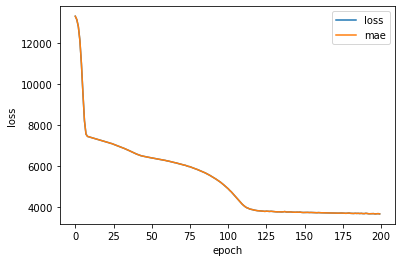

In [46]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**How many epochs** : [Tensorflow Early Stopping Callbacks, ](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) Stop training when a monitored metric has stopped improving.